<a href="https://colab.research.google.com/github/Prebor97/hamoyeStagecodes/blob/master/hamoyetagalong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET (1).csv


In [ ]:
import pandas as pd
import numpy as np
import io
df = pd.read_csv(io.BytesIO(uploaded['Time_series_analysis_and_forecast_DATASET.csv']))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
display(df.head(2))

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635


In [ ]:
len(df)

92016

In [ ]:
df['FullDate']= pd.to_datetime(df['FullDate'])

In [ ]:
df = df.rename(columns = {'FullDate': 'ds', 'ElecPrice' : 'y'})
display(df.head(5))

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


Text(0, 0.5, 'ElecPrice')

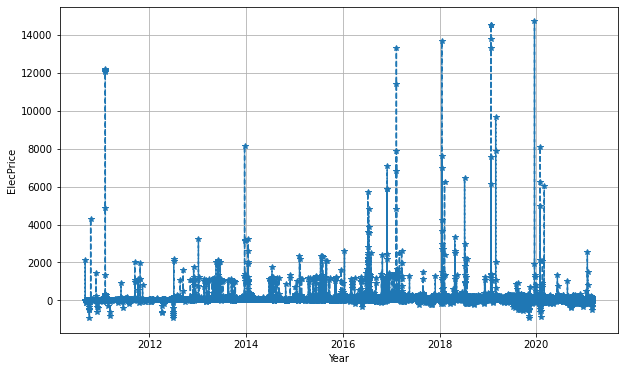

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.y, '--', marker = '*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('ElecPrice')

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df1['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

ADF Statistic: -3.6901589888366457
p-value: 0.004253725504574117
No. of lags used: 30
No. of observations used : 3803
Critical Values:
   1%: -3.432070672988693
   5%: -2.8623002987378547
   10%: -2.567174716967499


In [ ]:
adf_result1 = adfuller(df1['GasPrice'])
print(f'ADF Statistic: {adf_result1[0]}')
print(f'p-value: {adf_result1[1]}')
print(f'No. of lags used: {adf_result1[2]}')
print(f'No. of observations used : {adf_result1[3]}')
print('Critical Values:')
for k, v in adf_result1[4].items():
    print(f'   {k}: {v}') 

ADF Statistic: -2.90276669716518
p-value: 0.04502721288462542
No. of lags used: 27
No. of observations used : 3806
Critical Values:
   1%: -3.4320693157877544
   5%: -2.8622996992165364
   10%: -2.5671743978048323


In [ ]:
df.set_index('ds', inplace = True)

In [ ]:
df1 = df.resample('D').sum()

In [ ]:
len(df1)

3834

In [ ]:
len(df)

92016

In [ ]:
train_df = df1.iloc[:2757]
test_df = df1.iloc[2757:]

In [ ]:
TRAIN_df = train_df.rename(columns = {'Tmax': 'add1', 'SysLoad' : 'add2', 'GasPrice' : 'add3'})
TEST_df = test_df.rename(columns = {'Tmax': 'add1', 'SysLoad' : 'add2', 'GasPrice' : 'add3'})

In [ ]:
TRAIN_df.reset_index(inplace = True)
TEST_df.reset_index(inplace = True)

In [ ]:
TRAIN_df.head()

,ds,add1,add2,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fbprophet import Prophet

In [ ]:
df1.columns

Index(['Tmax', 'SysLoad', 'GasPrice', 'y'], dtype='object')

In [ ]:
Train_df = train_df.drop(columns=['Tmax','SysLoad','GasPrice'])
Test_df = test_df.drop(columns=['Tmax','SysLoad','GasPrice'])

In [ ]:
Train_df.reset_index(inplace = True)

In [ ]:
Test_df.reset_index(inplace = True)

In [ ]:
Train_df.head(2)

,ds,y
0,2010-09-01,2751.70
1,2010-09-02,570.81


In [ ]:
model = Prophet()
model.fit(Train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
Test_df1 = Test_df[['ds']]
Test_df1.head(2)

,ds
0,2018-03-20
1,2018-03-21


In [ ]:
forecast = model.predict(Test_df1)

In [ ]:
forecast = forecast[['ds', 'yhat']]

In [ ]:
final_pred1 = pd.concat((forecast['yhat'],Test_df), axis = 1 )

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [ ]:
mse = mean_absolute_error(final_pred1.y, final_pred1.yhat)

In [ ]:
mse

1748.5192459342127

Training a multivariant model

In [ ]:
model1 = Prophet()
model1.add_regressor('add1', standardize = False)
model1.add_regressor('add2', standardize = False)
model1.add_regressor('add3', standardize = False)
model1.fit(TRAIN_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
TEST_df.columns

Index(['ds', 'add1', 'add2', 'add3', 'y'], dtype='object')

In [ ]:
TEST_df1 = TEST_df[['ds','add1','add2','add3']]

In [ ]:
TEST_df1.head(3)

,ds,add1,add2,add3
0,2018-03-20,540.0,7696.91130,201.588
1,2018-03-21,571.2,4658.05865,203.256
2,2018-03-22,722.4,19161.78525,203.256


In [ ]:
#Multivariant forecast
forecast1 = model.predict(TEST_df1)

In [ ]:
forecast1 = forecast1[['ds', 'yhat']]
forecast1.head()

,ds,yhat
0,2018-03-20,2536.337494
1,2018-03-21,2689.655459
2,2018-03-22,2788.705741
3,2018-03-23,2580.977221
4,2018-03-24,2256.367941


In [ ]:
final_pred = pd.concat((forecast1['yhat'],TEST_df), axis = 1 )

In [ ]:
final_pred.head()

,yhat,ds,add1,add2,add3,y
0,2536.337494,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2689.655459,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2788.705741,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2580.977221,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2256.367941,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [ ]:
mse1 = mean_absolute_error(final_pred.y, final_pred.yhat)

In [ ]:
mse1

1748.5192459342127